In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [ ]:
ls crime_data_raw/2012

In [2]:
path = 'crime_data_raw/2012'

In [3]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [4]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [5]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [6]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 10 columns):
Date             127771 non-null datetime64[ns]
Hour             127771 non-null int64
Offense Type     127771 non-null object
Beat             127771 non-null object
Premise          127771 non-null object
Block Range      127771 non-null object
Street Name      127771 non-null object
Type             127771 non-null object
Suffix           127771 non-null object
# Of Offenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [8]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2012-04-05,2,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04,22,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1
2,2012-04-01,23,Murder,19G10,20A,7500-7599,CORPORATE,DR,-,1
3,2012-04-21,23,Murder,8C10,20R,6200-6299,RIETTA,-,-,1
4,2012-04-01,6,Murder,3B10,20A,4200-4299,34TH,ST,W,1


In [9]:
# check if  null values
df.isnull().values.any().any()

False

In [10]:
# check su, of null values
df.isnull().values.sum()

0

In [11]:
len(df[df.isnull().any(axis=1)])

0

## Visualize our data

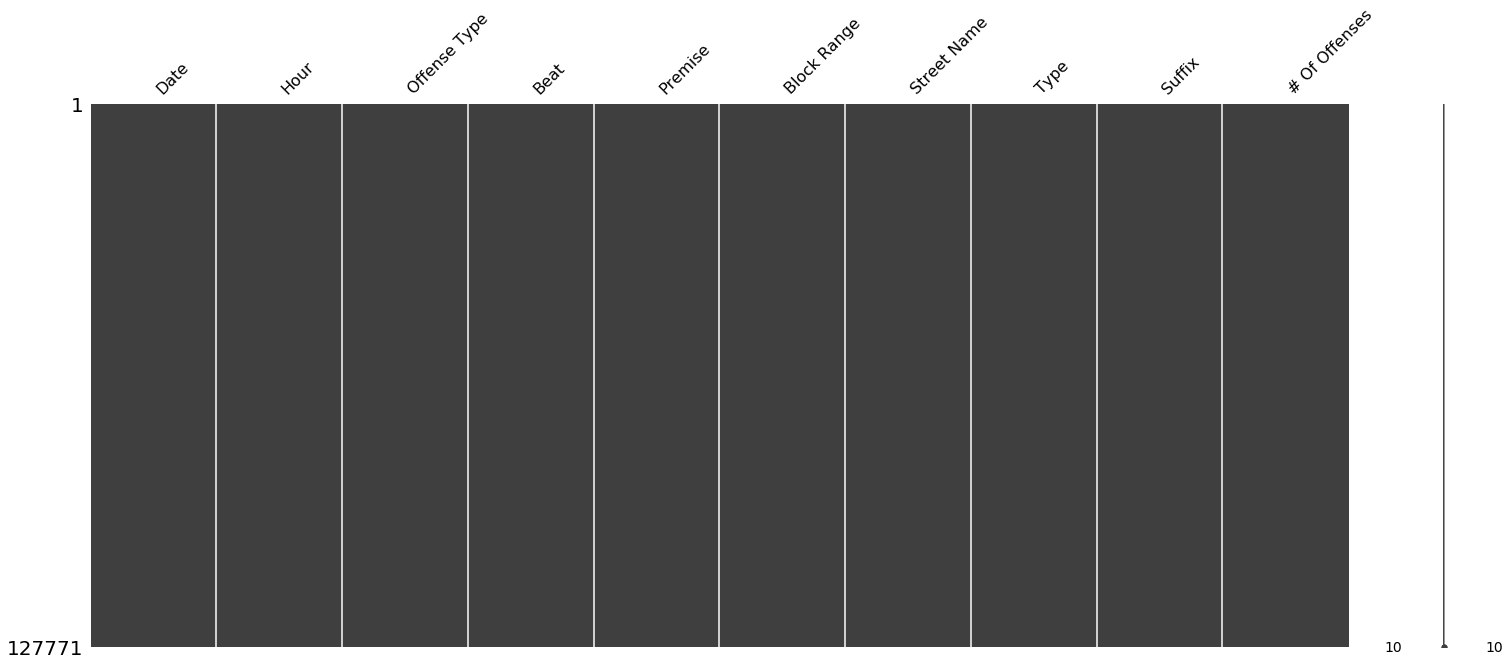

In [12]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [13]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2012-04-05,2,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04,22,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1
2,2012-04-01,23,Murder,19G10,20A,7500-7599,CORPORATE,DR,-,1
3,2012-04-21,23,Murder,8C10,20R,6200-6299,RIETTA,-,-,1
4,2012-04-01,6,Murder,3B10,20A,4200-4299,34TH,ST,W,1


In [14]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 10 columns):
Date           127771 non-null datetime64[ns]
Hour           127771 non-null int64
OffenseType    127771 non-null object
Beat           127771 non-null object
Premise        127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
Type           127771 non-null object
Suffix         127771 non-null object
NumOffenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
#     'Block Range': 'BlockRange',
#     'Street Name': 'StreetName'
# }, inplace=True)
# df.info()

## Subset dataframe to work on 

In [15]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 8 columns):
Date           127771 non-null datetime64[ns]
Beat           127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
OffenseType    127771 non-null object
Premise        127771 non-null object
NumOffenses    127771 non-null int64
Hour           127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.8+ MB


## Find NaN
- drop if > 2 nan

In [16]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [17]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [ ]:
crimes = crimes.dropna(thresh=2)

In [ ]:
crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [18]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127774 entries, 0 to 127773
Data columns (total 9 columns):
Date                   127771 non-null datetime64[ns]
Beat                   127771 non-null object
BlockRange             127771 non-null object
StreetName             127771 non-null object
OffenseType            127771 non-null object
Premise                127774 non-null object
NumOffenses            127771 non-null float64
Hour                   127771 non-null float64
Premise Description    127148 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.7+ MB


In [19]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2012-04-05,17E40,6100-6199,CLARIDGE,Murder,20R,1.0,2.0,RESIDENCE/HOUSE
1,2012-04-21,8C10,6200-6299,RIETTA,Murder,20R,1.0,23.0,RESIDENCE/HOUSE
2,2012-04-30,7C20,4000-4099,LIBERTY,Murder,20R,1.0,8.0,RESIDENCE/HOUSE
3,2012-04-12,7C50,19400-19499,BORDERS,Rape,20R,1.0,4.0,RESIDENCE/HOUSE
4,2012-04-23,16E20,4100-4199,KNOTTY OAKS,Rape,20R,1.0,8.0,RESIDENCE/HOUSE


## Visualize data

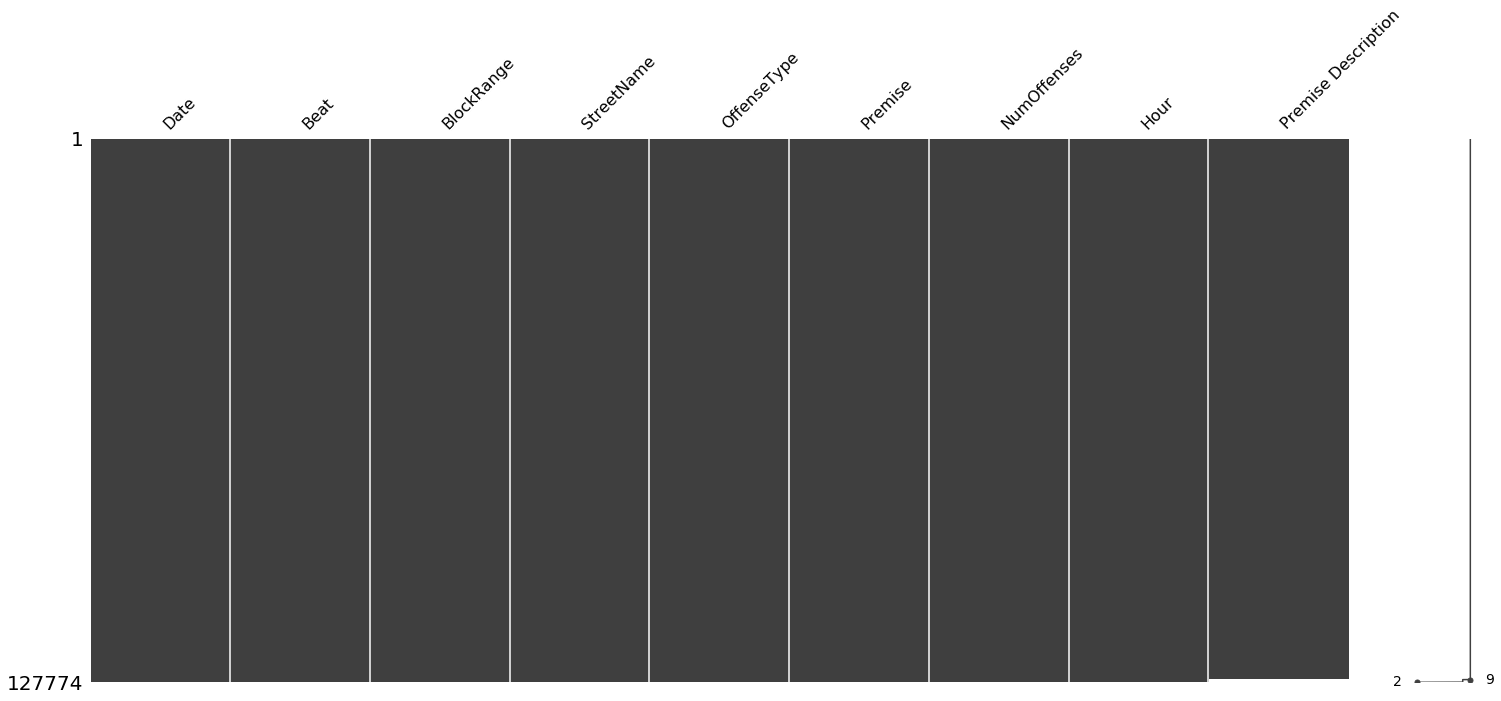

In [20]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [21]:
len(crimes[crimes.isnull().any(axis=1)])

629

In [22]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
118421,2012-04-22,2A10,1200-1299,HOGAN,Robbery,N,1.0,2.0,NaN
118422,2012-08-04,1A30,2000-2099,PORTSMOUTH,Theft,N,1.0,23.0,NaN
118423,2012-08-25,7C30,10300-10399,EASTEX,Theft,N,1.0,14.0,NaN
118424,2012-12-12,8C50,9300-9399,TIDWELL,Aggravated Assault,N,1.0,10.0,NaN
118425,2012-12-12,3B50,4400-4499,NORTH,Theft,N,1.0,7.0,NaN
118426,2012-12-22,1A10,700-799,MEMORIAL,Theft,N,1.0,16.0,NaN
118427,2012-12-28,18F40,2900-2999,ROLIDO,Theft,N,1.0,19.0,NaN
118428,2012-02-22,16E30,4600-4699,KNOTTY OAKS,Auto Theft,N,1.0,21.0,NaN
118429,2012-01-13,1A20,900-999,ROBIN,Theft,N,1.0,13.0,NaN
118430,2012-01-09,1A30,1600-1699,CHERRYHURST,Theft,N,1.0,1.0,NaN


## drop rows with 2 or 3 or more NaN

In [23]:
crimes = crimes.dropna(thresh=3)

In [24]:
len(crimes[crimes.isnull().any(axis=1)])

626

In [25]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
118421,2012-04-22,2A10,1200-1299,HOGAN,Robbery,N,1.0,2.0,NaN
118422,2012-08-04,1A30,2000-2099,PORTSMOUTH,Theft,N,1.0,23.0,NaN
118423,2012-08-25,7C30,10300-10399,EASTEX,Theft,N,1.0,14.0,NaN
118424,2012-12-12,8C50,9300-9399,TIDWELL,Aggravated Assault,N,1.0,10.0,NaN
118425,2012-12-12,3B50,4400-4499,NORTH,Theft,N,1.0,7.0,NaN
118426,2012-12-22,1A10,700-799,MEMORIAL,Theft,N,1.0,16.0,NaN
118427,2012-12-28,18F40,2900-2999,ROLIDO,Theft,N,1.0,19.0,NaN
118428,2012-02-22,16E30,4600-4699,KNOTTY OAKS,Auto Theft,N,1.0,21.0,NaN
118429,2012-01-13,1A20,900-999,ROBIN,Theft,N,1.0,13.0,NaN
118430,2012-01-09,1A30,1600-1699,CHERRYHURST,Theft,N,1.0,1.0,NaN


## Inspect each column

In [26]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat

In [27]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

In [28]:
crimes.Beat.value_counts(dropna=False).head()

12D10    2973
19G10    2832
6B60     2797
3B10     2476
13D20    2397
Name: Beat, dtype: int64

In [ ]:
#crimes.Beat.unique()

In [29]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [30]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

## BlockRange

In [31]:
len(crimes.BlockRange.value_counts(dropna=False))

243

In [32]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1828
100-199      1725
9400-9499    1681
4400-4499    1534
800-899      1503
Name: BlockRange, dtype: int64

In [33]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [34]:
len(crimes.BlockRange.value_counts(dropna=False))

243

## StreetName

In [35]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7553


In [36]:
crimes.StreetName = crimes.StreetName.str.strip()

In [37]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7553


In [38]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3534
GESSNER       2000
GULF          1909
RICHMOND      1786
NORTH         1738
Name: StreetName, dtype: int64


## OffenseType

In [39]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [40]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [41]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [42]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67978
Burglary              26630
Auto Theft            12672
Aggravated Assault    10238
Robbery                9385
Rape                    663
Murder                  205
Name: OffenseType, dtype: int64


## Premise

In [43]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:126


In [44]:
crimes.Premise = crimes.Premise.str.strip()

In [45]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:126


In [46]:
crimes.Premise.value_counts(dropna=False).head()

20A    16963
20R    16740
18A    15070
13R     9323
20D     7823
Name: Premise, dtype: int64

## Premise Description

In [47]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:124


In [48]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [49]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:124


In [50]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                16963
RESIDENCE/HOUSE          16740
APARTMENT PARKING LOT    15070
ROAD/STREET/SIDEWALK      9323
DRIVEWAY                  7823
Name: Premise Description, dtype: int64


# Set Date as index

In [51]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [52]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1973-11-16,1A30,2500-2599,RICHMOND,Theft,210,1.0,13.0,RESTAURANT/CAFETERIA
1975-05-17,4F30,1800-1899,BARKER CYPRESS,Robbery,20A,1.0,15.0,APARTMENT
1979-07-07,18F50,3400-3499,DUNVALE,Burglary,20A,1.0,2.0,APARTMENT
1982-01-01,19G30,13000-13099,LEADER,Rape,20A,1.0,15.0,APARTMENT
1987-03-20,18F30,6300-6399,WINDSWEPT,Theft,05N,1.0,0.0,MAINTENANCE/BUILDING SERVICES


## Create Columns with day,weekday,month,year from date index

In [53]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [54]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1973-11-16,1A30,2500-2599,RICHMOND,Theft,210,1.0,13.0,RESTAURANT/CAFETERIA,16,Friday,Nov,1973
1975-05-17,4F30,1800-1899,BARKER CYPRESS,Robbery,20A,1.0,15.0,APARTMENT,17,Saturday,May,1975
1979-07-07,18F50,3400-3499,DUNVALE,Burglary,20A,1.0,2.0,APARTMENT,07,Saturday,Jul,1979
1982-01-01,19G30,13000-13099,LEADER,Rape,20A,1.0,15.0,APARTMENT,01,Friday,Jan,1982
1987-03-20,18F30,6300-6399,WINDSWEPT,Theft,05N,1.0,0.0,MAINTENANCE/BUILDING SERVICES,20,Friday,Mar,1987


## null values

- check
- count
- display

In [55]:
crimes.isnull().values.any().any()

True

In [56]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

626

In [57]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
2012-01-01,20G60,13000-13099,KATY,Theft,---,1.0,12.0,NaN,01,Sunday,Jan,2012
2012-01-01,19G10,10100-10199,CLUB CREEK,Aggravated Assault,---,1.0,1.0,NaN,01,Sunday,Jan,2012
2012-01-02,18F40,9500-9599,WESTHEIMER,Theft,---,1.0,17.0,NaN,02,Monday,Jan,2012
2012-01-05,20G70,3800-3899,SYNOTT,Theft,---,1.0,0.0,NaN,05,Thursday,Jan,2012
2012-01-06,20G70,12700-12799,WESTHEIMER,Theft,---,1.0,0.0,NaN,06,Friday,Jan,2012
2012-01-07,7C50,6700-6799,BENDER,Auto Theft,---,1.0,1.0,NaN,07,Saturday,Jan,2012
2012-01-07,15E40,8400-8499,KIRBY,Theft,---,1.0,13.0,NaN,07,Saturday,Jan,2012
2012-01-09,11H30,8000-8099,BARKLEY,Aggravated Assault,---,1.0,22.0,NaN,09,Monday,Jan,2012
2012-01-09,1A30,1600-1699,CHERRYHURST,Theft,N,1.0,1.0,NaN,09,Monday,Jan,2012


In [58]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127771 entries, 1973-11-16 to 2029-05-26
Data columns (total 12 columns):
Beat                   127771 non-null object
BlockRange             127771 non-null object
StreetName             127771 non-null object
OffenseType            127771 non-null object
Premise                127771 non-null object
NumOffenses            127771 non-null float64
Hour                   127771 non-null float64
Premise Description    127145 non-null object
day                    127771 non-null object
weekday                127771 non-null object
month                  127771 non-null object
year                   127771 non-null object
dtypes: float64(2), object(10)
memory usage: 15.2+ MB


## New Dataframe
- remove premise col
- keep premise description

In [59]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1973-11-16,1A30,2500-2599,RICHMOND,Theft,RESTAURANT/CAFETERIA,1.0,13.0,16,Friday,Nov,1973
1975-05-17,4F30,1800-1899,BARKER CYPRESS,Robbery,APARTMENT,1.0,15.0,17,Saturday,May,1975
1979-07-07,18F50,3400-3499,DUNVALE,Burglary,APARTMENT,1.0,2.0,07,Saturday,Jul,1979
1982-01-01,19G30,13000-13099,LEADER,Rape,APARTMENT,1.0,15.0,01,Friday,Jan,1982
1987-03-20,18F30,6300-6399,WINDSWEPT,Theft,MAINTENANCE/BUILDING SERVICES,1.0,0.0,20,Friday,Mar,1987


In [60]:
crime_yr.isnull().values.any().any()

True

In [61]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

626

In [62]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2012-01-01,20G60,13000-13099,KATY,Theft,NaN,1.0,12.0,01,Sunday,Jan,2012
2012-01-01,19G10,10100-10199,CLUB CREEK,Aggravated Assault,NaN,1.0,1.0,01,Sunday,Jan,2012
2012-01-02,18F40,9500-9599,WESTHEIMER,Theft,NaN,1.0,17.0,02,Monday,Jan,2012
2012-01-05,20G70,3800-3899,SYNOTT,Theft,NaN,1.0,0.0,05,Thursday,Jan,2012
2012-01-06,20G70,12700-12799,WESTHEIMER,Theft,NaN,1.0,0.0,06,Friday,Jan,2012
2012-01-07,7C50,6700-6799,BENDER,Auto Theft,NaN,1.0,1.0,07,Saturday,Jan,2012
2012-01-07,15E40,8400-8499,KIRBY,Theft,NaN,1.0,13.0,07,Saturday,Jan,2012
2012-01-09,11H30,8000-8099,BARKLEY,Aggravated Assault,NaN,1.0,22.0,09,Monday,Jan,2012
2012-01-09,1A30,1600-1699,CHERRYHURST,Theft,NaN,1.0,1.0,09,Monday,Jan,2012


## Drop rows with 2 or more NaN values

In [ ]:
#crime_yr = crime_yr.dropna(thresh=2)

In [ ]:
# display any null


#len(crime_yr[crime_yr.isnull().any(axis=1)])

In [ ]:
#crime_yr[crime_yr.isnull().any(axis=1)]

## replace nan
- replace nan with no labels

In [63]:
crime_yr = crime_yr.replace(np.nan, 'No label')

In [64]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [65]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [66]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127771 entries, 1973-11-16 to 2029-05-26
Data columns (total 11 columns):
Beat           127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
OffenseType    127771 non-null object
Premise        127771 non-null object
NumOffenses    127771 non-null float64
Hour           127771 non-null float64
day            127771 non-null object
weekday        127771 non-null object
month          127771 non-null object
year           127771 non-null object
dtypes: float64(2), object(9)
memory usage: 11.7+ MB


In [67]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1973-11-16,1A30,2500-2599,RICHMOND,Theft,RESTAURANT/CAFETERIA,1.0,13.0,16,Friday,Nov,1973
1975-05-17,4F30,1800-1899,BARKER CYPRESS,Robbery,APARTMENT,1.0,15.0,17,Saturday,May,1975
1979-07-07,18F50,3400-3499,DUNVALE,Burglary,APARTMENT,1.0,2.0,07,Saturday,Jul,1979
1982-01-01,19G30,13000-13099,LEADER,Rape,APARTMENT,1.0,15.0,01,Friday,Jan,1982
1987-03-20,18F30,6300-6399,WINDSWEPT,Theft,MAINTENANCE/BUILDING SERVICES,1.0,0.0,20,Friday,Mar,1987


In [ ]:
ls crime_data_clean/new

In [68]:
crime_yr.to_csv('crime_data_clean/new/crime12_clean.csv')

In [69]:
ls crime_data_clean/new

crime10_clean.csv*  crime11_clean.csv*  crime12_clean.csv*
